In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from IPython.display import Image, display
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('C:/123B2F143/ML/Titanic-Dataset.csv')

In [3]:
# Display the first 5 rows
display(df.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Columns such as PassengerId and Ticket are not cause of any effect on the result so we will remove them
df = df.drop(['PassengerId', 'Ticket'], axis=1)

In [5]:
# Get the summery of dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Fare      891 non-null    float64
 8   Cabin     204 non-null    object 
 9   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB
None


In [6]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
# Get the shape of dataset
print(df.shape)

(891, 10)


In [8]:
# List all column names
print(df.columns)

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Cabin', 'Embarked'],
      dtype='object')


In [9]:
# Let's check for missing values in each column and print that column

print("Columns having missing values are: ")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

Columns having missing values are: 
Age         177
Cabin       687
Embarked      2
dtype: int64


In [10]:
# Let's handle the missing values

# let's handle the missing values in age with median
df['Age'] = df['Age'].fillna(df['Age'].median())
# let's handle the missing vakues in cabin
df['Cabin'] = df['Cabin'].fillna(df['Cabin'].mode()[0])
# # let's Embarked the missing vakues in cabin
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [11]:
print("Columns having missing values are: ")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

Columns having missing values are: 
Series([], dtype: int64)


In [12]:
# let's handle the duplicates

duplicates = df.duplicated().sum()
print(f"Number of rows duplicated: {duplicates}")
if duplicates == 0:
    print("No duplicate values")

Number of rows duplicated: 0
No duplicate values


In [31]:
df.to_csv("C:/123B2F143/ML/Titanic-Dataset-Cleaned.csv", index=False)

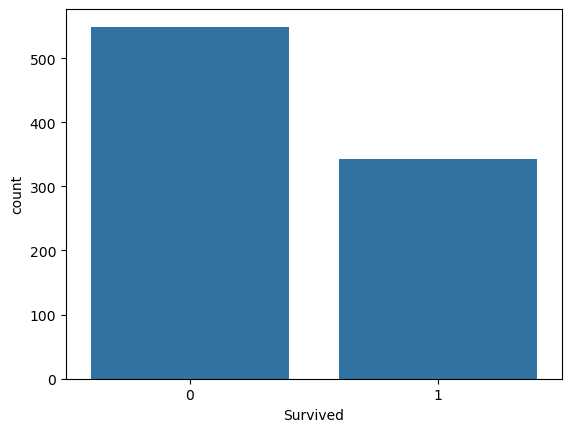

In [13]:
# let's start the visualization

# survival rate
sns.countplot(x='Survived', data=df);

In [14]:
# survival rate per gender
df.groupby(['Survived', 'Sex'])['Survived'].count()

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: Survived, dtype: int64

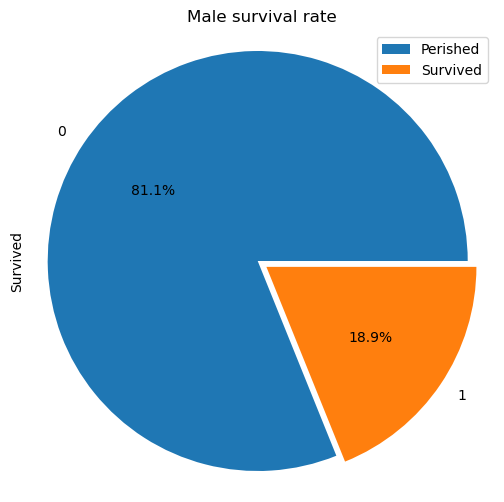

In [15]:
# Male survival rate
df[df['Sex'] == 'male'].Survived.groupby(df.Survived).count().plot(kind='pie', figsize=(6, 6),explode=[0,0.05],autopct='%1.1f%%')
plt.axis('equal')
plt.legend(["Perished","Survived"])
plt.title("Male survival rate")
plt.show()

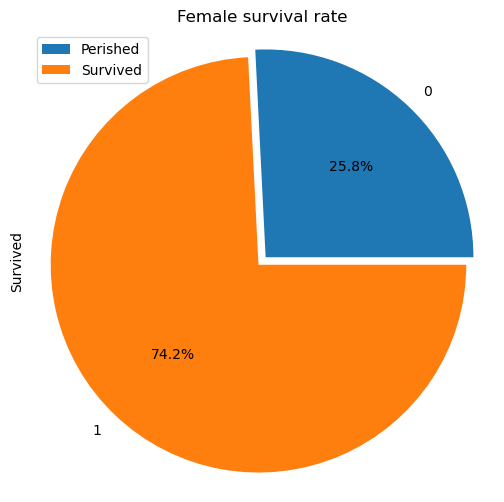

In [16]:
# Female survival rate
df[df['Sex'] == 'female'].Survived.groupby(df.Survived).count().plot(kind='pie', figsize=(6, 6),explode=[0,0.05],autopct='%1.1f%%')
plt.axis('equal')
plt.legend(["Perished","Survived"])
plt.title("Female survival rate")
plt.show()

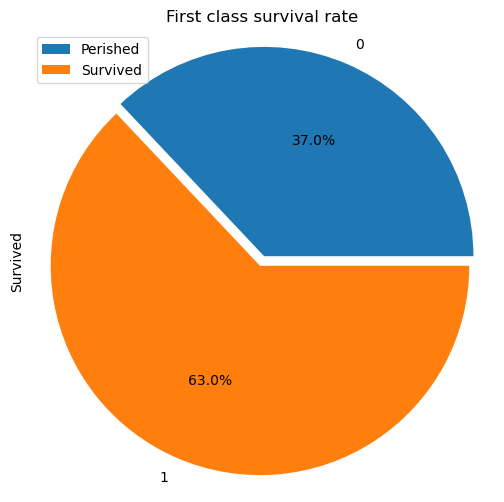

In [17]:
df[df['Pclass'] == 1].Survived.groupby(df.Survived).count().plot(kind='pie', figsize=(6, 6),explode=[0,0.05],autopct='%1.1f%%')
plt.axis('equal')
plt.legend(["Perished","Survived"])
plt.title("First class survival rate")
plt.show()

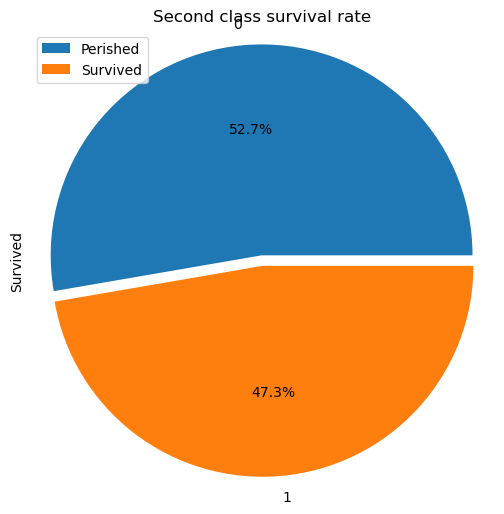

In [18]:
df[df['Pclass'] == 2].Survived.groupby(df.Survived).count().plot(kind='pie', figsize=(6, 6),explode=[0,0.05],autopct='%1.1f%%')
plt.axis('equal')
plt.legend(["Perished","Survived"])
plt.title("Second class survival rate")
plt.show()

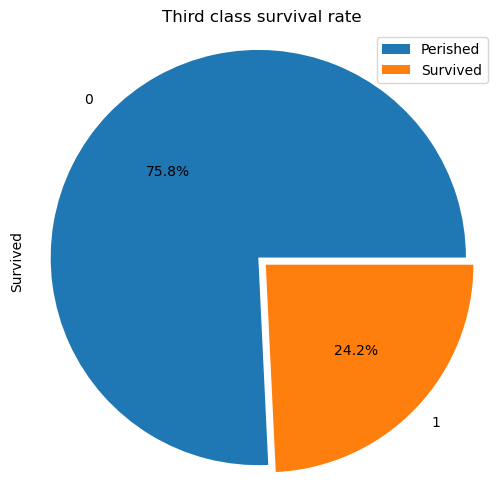

In [19]:
df[df['Pclass'] == 3].Survived.groupby(df.Survived).count().plot(kind='pie', figsize=(6, 6),explode=[0,0.05],autopct='%1.1f%%')
plt.axis('equal')
plt.legend(["Perished","Survived"])
plt.title("Third class survival rate")
plt.show()

In [20]:
df.Survived.value_counts(normalize=True)

Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64

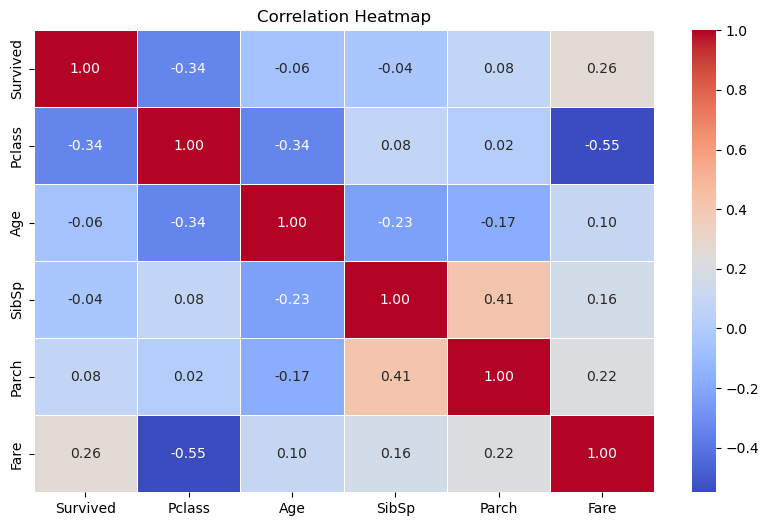

In [23]:
# 1. Correlation Matrix (Heatmap)
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

Value counts for Survived:
Survived
0    549
1    342
Name: count, dtype: int64 



C:\Users\ML\AppData\Local\Temp\ipykernel_11792\1654356860.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[feature], palette='pastel')


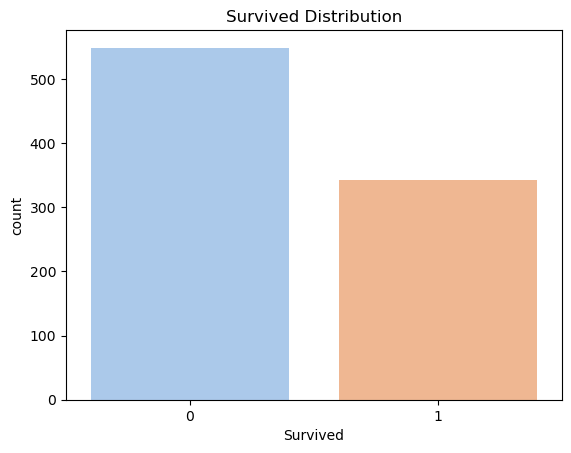

Value counts for Pclass:
Pclass
3    491
1    216
2    184
Name: count, dtype: int64 



C:\Users\ML\AppData\Local\Temp\ipykernel_11792\1654356860.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[feature], palette='pastel')


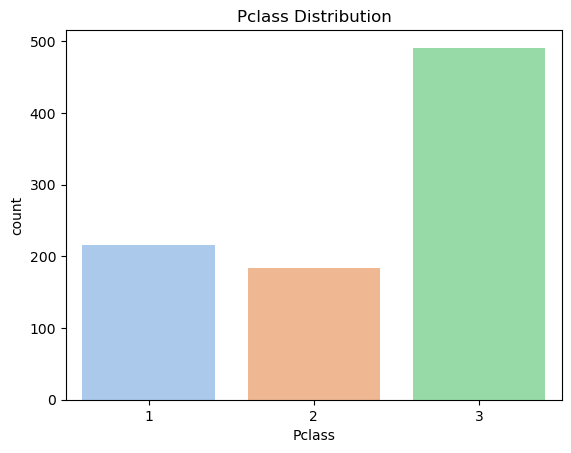

Value counts for Sex:
Sex
male      577
female    314
Name: count, dtype: int64 



C:\Users\ML\AppData\Local\Temp\ipykernel_11792\1654356860.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[feature], palette='pastel')


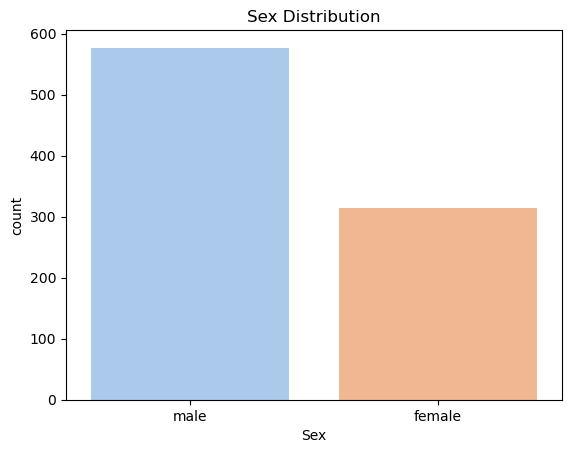

Value counts for Embarked:
Embarked
S    646
C    168
Q     77
Name: count, dtype: int64 



C:\Users\ML\AppData\Local\Temp\ipykernel_11792\1654356860.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[feature], palette='pastel')


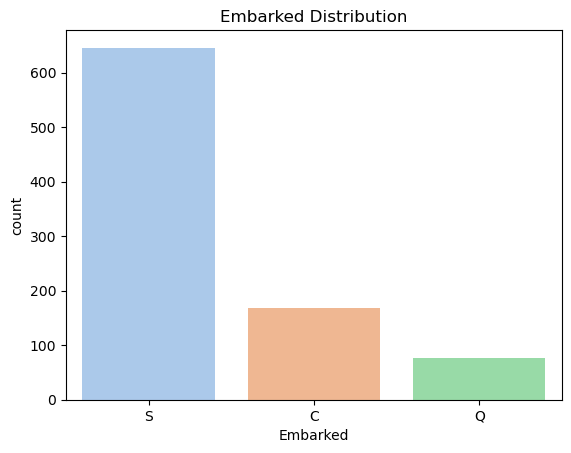

In [25]:
categorical_features = ['Survived', 'Pclass', 'Sex', 'Embarked']
for feature in categorical_features:
    print(f"Value counts for {feature}:")
    print(df[feature].value_counts(dropna=False), '\n')
    
    sns.countplot(x=df[feature], palette='pastel')
    plt.title(f'{feature} Distribution')
    plt.show()


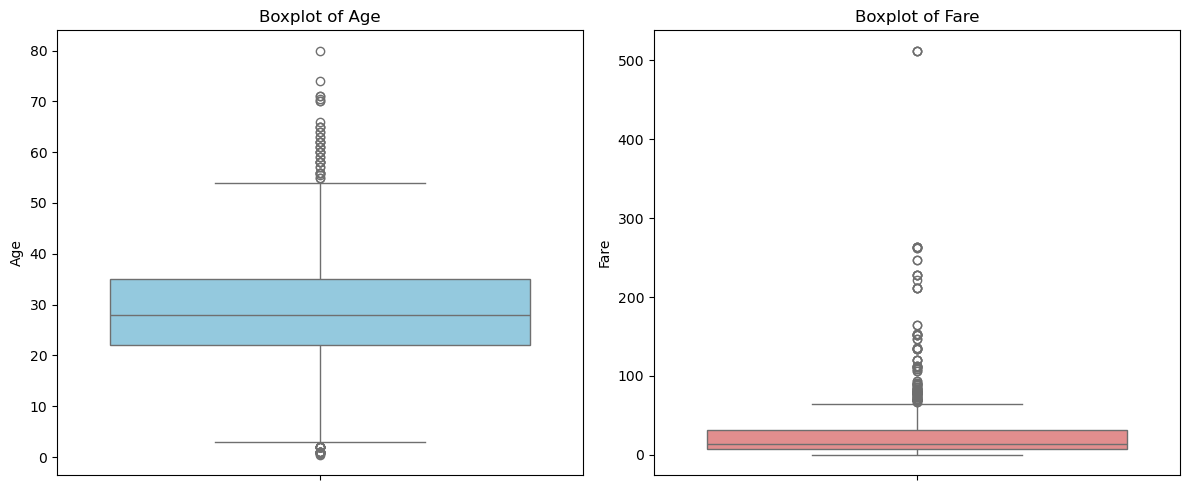

In [27]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.boxplot(y=df['Age'], ax=axes[0], color='skyblue')
axes[0].set_title('Boxplot of Age')

sns.boxplot(y=df['Fare'], ax=axes[1], color='lightcoral')
axes[1].set_title('Boxplot of Fare')

plt.tight_layout()
plt.show()